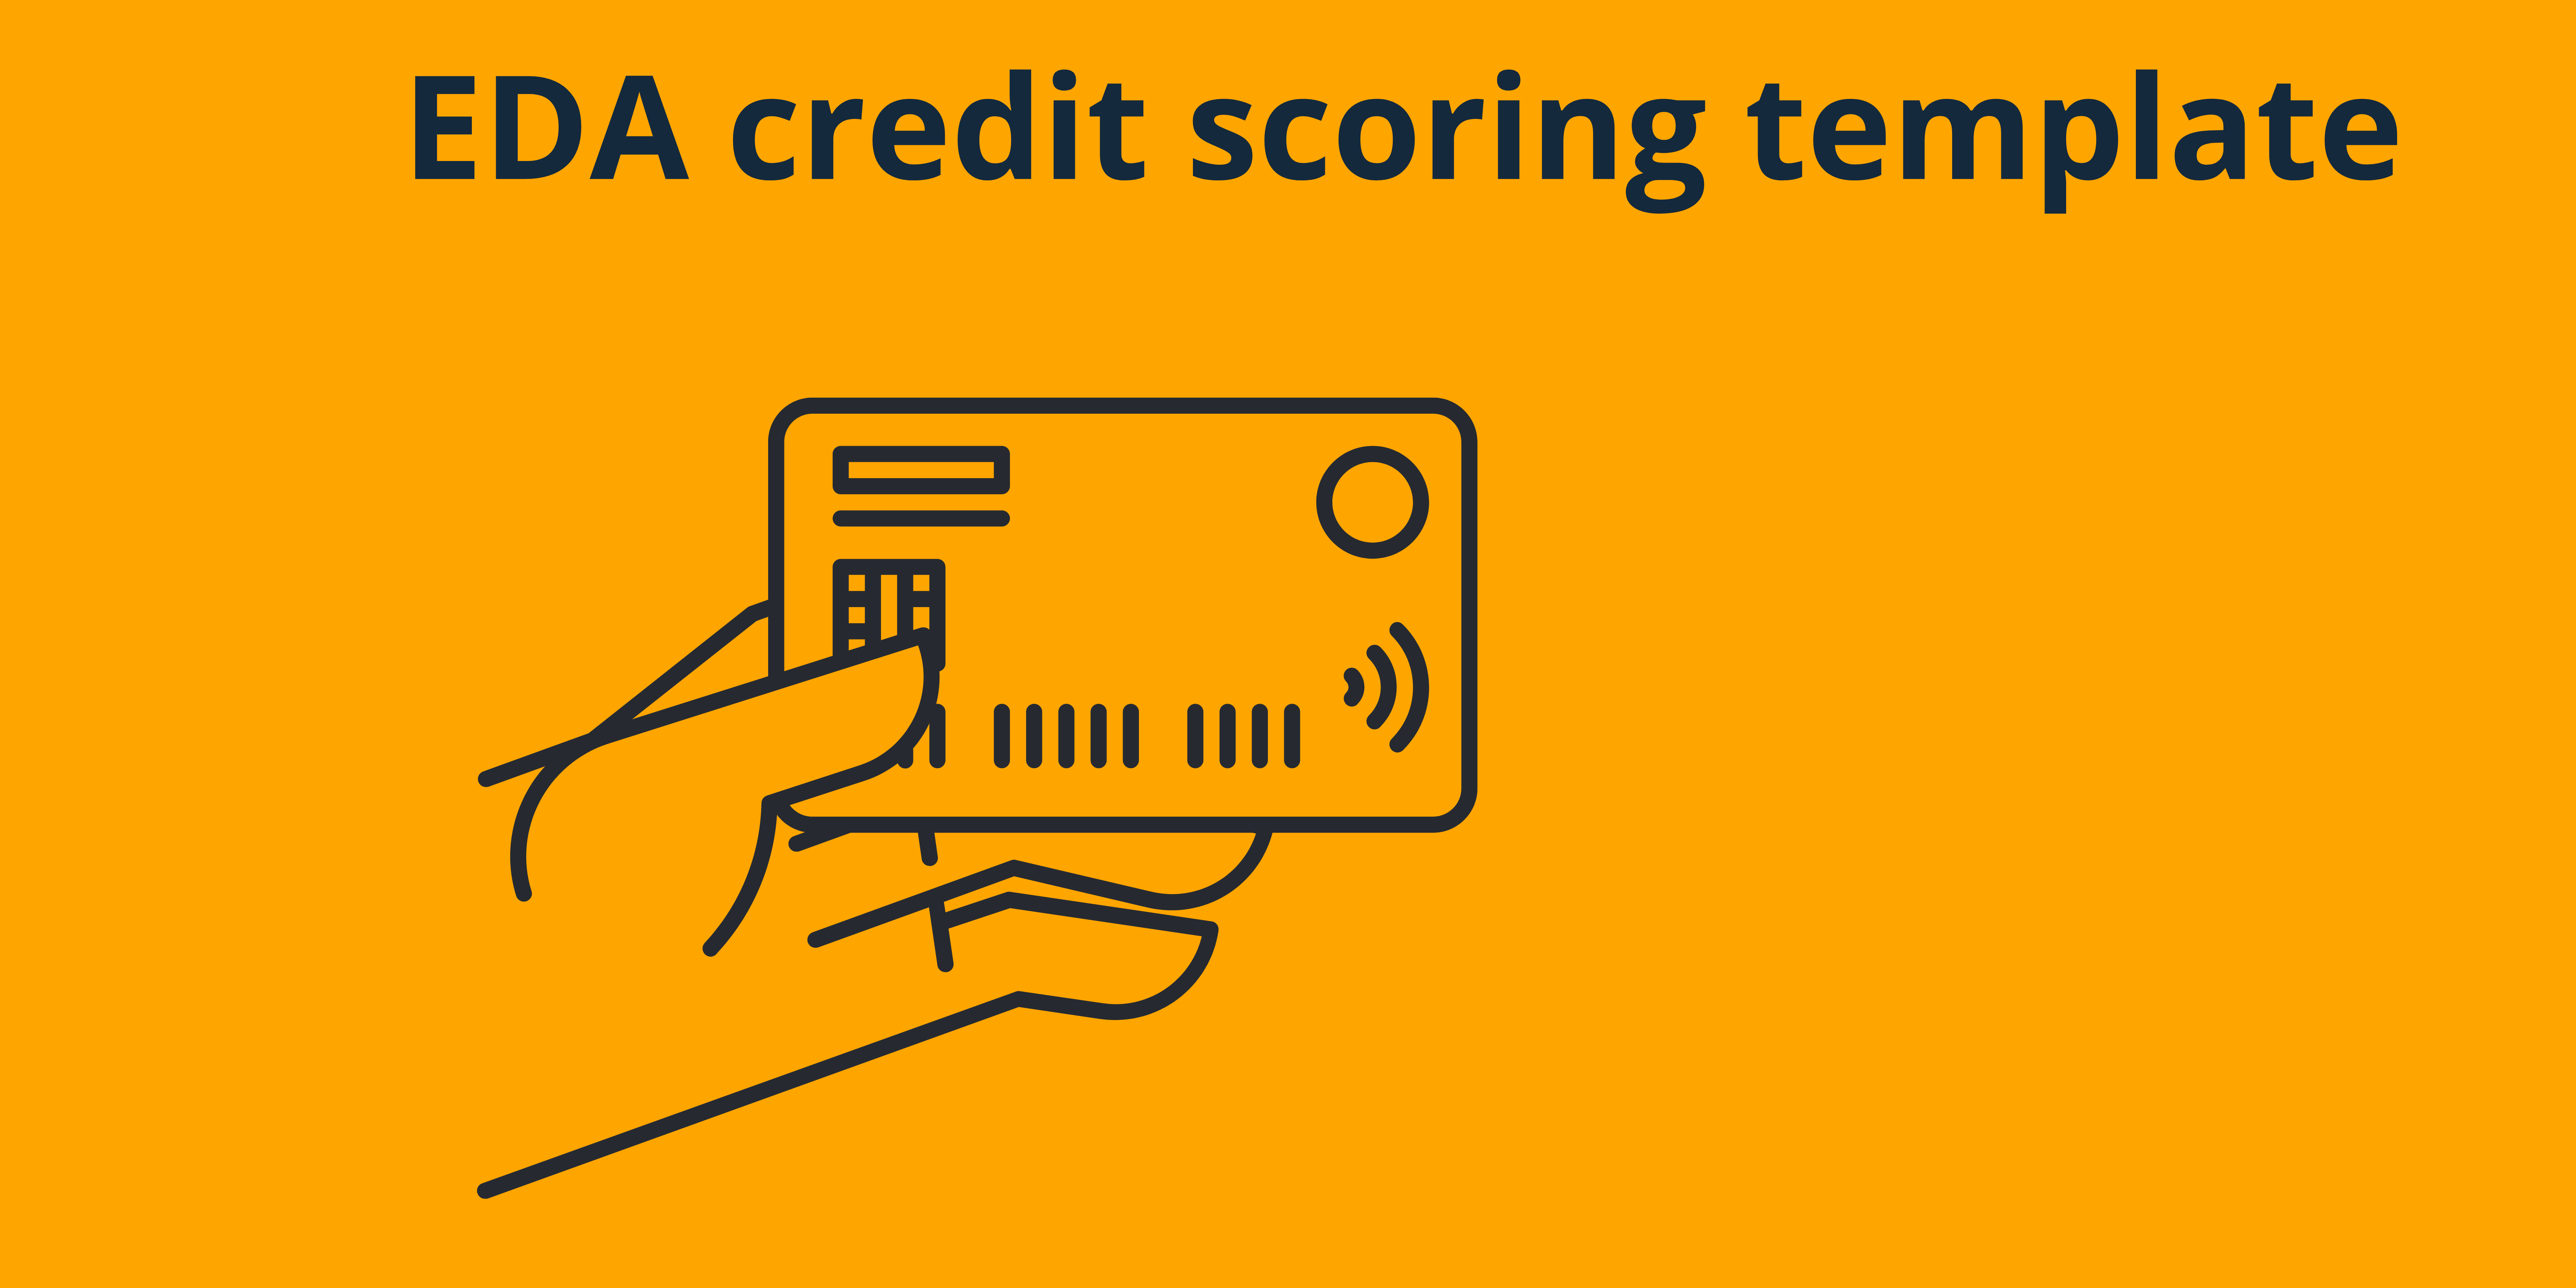

Датасет содержит информацию о клиентах некоторого банка.  
**_Задача_** состоит в том, чтобы по различным характеристикам клиентов спрогнозировать целевую переменную - имел клиент просрочку или нет (и если имел, то банк не будет выдавать кредит этому клиенту, а иначе будет)

# Импорт библиотек, константы

In [ ]:
# Библиотеки для обработки и анализа структурированных данных
import numpy as np
import pandas as pd

# Библиотеки визуализации
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Библиотека scikit-learn для машинного обучения
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import warnings


%matplotlib inline

Определим глобальные константы:

In [ ]:
# Параметр рандомизации
RANDOM_STATE = 42

## Загрузка и обзор данных

### Загрузка

In [ ]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
* `SeriousDlqin2yrs`: клиент имел просрочку 90 и более дней

**Признаки**
- `RevolvingUtilizationOfUnsecuredLines`: общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt
like car loans divided by the sum of credit limits)
- `age`: возраст заемщика
- `NumberOfTime30-59DaysPastDueNotWorse`: сколько раз за последние 2 года наблюдалась просрочка 30-59 дней
- `DebtRatio`: ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход
- `MonthlyIncome`: ежемесячный доход
- `NumberOfOpenCreditLinesAndLoans`: количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт
- `NumberOfTimes90DaysLate`: сколько раз наблюдалась просрочка (90 и более дней)
- `RealEstateLoansOrLines`: закодированное количество кредиов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов
- `NumberOfTime60-89DaysPastDueNotWorse`: сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней
- `NumberOfDependents`: количество иждивенцев на попечении (супруги, дети и др)
- `GroupAge`: закодированная возрастная группа - чем больше код, тем больше возраст

In [ ]:
# информация о столбцах
# изучаем данные - пропущенные значения и типы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [ ]:
# случайные три записи из датасета
df.sample(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
11498,0,0.055160,65.0,0,1822.000000,NaN,6,0,0,NaN,A,e
44456,0,0.104035,51.0,0,0.271381,5740.0,5,0,0,2.0,A,d
85235,0,0.077728,78.0,0,0.010489,3622.0,6,0,0,0.0,A,e


import numpy as np
from google.colab import autoviz
df_2416035317301048804 = autoviz.get_registered_df('df_2416035317301048804')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2416035317301048804, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1711341870092601669 = autoviz.get_registered_df('df_1711341870092601669')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1711341870092601669, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3030991581682784532 = autoviz.get_registered_df('df_3030991581682784532')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3030991581682784532, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6514666428755869709 = autoviz.get_registered_df('df_6514666428755869709')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6514666428755869709, *['MonthlyIncome'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4743572691112843818 = autoviz.get_registered_df('df_4743572691112843818')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4743572691112843818, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4215609423732486917 = autoviz.get_registered_df('df_4215609423732486917')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4215609423732486917, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6018519656235159811 = autoviz.get_registered_df('df_6018519656235159811')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6018519656235159811, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6899452999351237643 = autoviz.get_registered_df('df_6899452999351237643')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6899452999351237643, *['MonthlyIncome'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3407962230618331672 = autoviz.get_registered_df('df_3407962230618331672')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3407962230618331672, *['GroupAge'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3072349520145849433 = autoviz.get_registered_df('df_3072349520145849433')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3072349520145849433, *[[['RevolvingUtilizationOfUnsecuredLines', 'age'], ['age', 'DebtRatio'], ['DebtRatio', 'MonthlyIncome'], ['MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6312702025903247111 = autoviz.get_registered_df('df_6312702025903247111')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6312702025903247111, *['RevolvingUtilizationOfUnsecuredLines', 'GroupAge'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3806906445217037496 = autoviz.get_registered_df('df_3806906445217037496')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3806906445217037496, *['age', 'GroupAge'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1669834866199384568 = autoviz.get_registered_df('df_1669834866199384568')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1669834866199384568, *['DebtRatio', 'GroupAge'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2229329746108053348 = autoviz.get_registered_df('df_2229329746108053348')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2229329746108053348, *['MonthlyIncome', 'GroupAge'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5830757670497964975 = autoviz.get_registered_df('df_5830757670497964975')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5830757670497964975, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4637497991701143580 = autoviz.get_registered_df('df_4637497991701143580')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4637497991701143580, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1553984984603024072 = autoviz.get_registered_df('df_1553984984603024072')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1553984984603024072, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2232938400092423992 = autoviz.get_registered_df('df_2232938400092423992')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2232938400092423992, *['MonthlyIncome'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2279233989839203440 = autoviz.get_registered_df('df_2279233989839203440')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2279233989839203440, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5096855376725073710 = autoviz.get_registered_df('df_5096855376725073710')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5096855376725073710, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7353788849435854046 = autoviz.get_registered_df('df_7353788849435854046')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7353788849435854046, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6471457606904318435 = autoviz.get_registered_df('df_6471457606904318435')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6471457606904318435, *['MonthlyIncome'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5054531411016135787 = autoviz.get_registered_df('df_5054531411016135787')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5054531411016135787, *['GroupAge'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3170151319109597608 = autoviz.get_registered_df('df_3170151319109597608')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3170151319109597608, *[[['RevolvingUtilizationOfUnsecuredLines', 'age'], ['age', 'DebtRatio'], ['DebtRatio', 'MonthlyIncome'], ['MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6430090825408748402 = autoviz.get_registered_df('df_6430090825408748402')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6430090825408748402, *['RevolvingUtilizationOfUnsecuredLines', 'GroupAge'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2915174991556936466 = autoviz.get_registered_df('df_2915174991556936466')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2915174991556936466, *['age', 'GroupAge'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7724212761937132208 = autoviz.get_registered_df('df_7724212761937132208')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7724212761937132208, *['DebtRatio', 'GroupAge'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8892720935337913273 = autoviz.get_registered_df('df_8892720935337913273')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8892720935337913273, *['MonthlyIncome', 'GroupAge'], **{'inner': 'stick'})
chart

In [ ]:
df.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
149995,0,0.977899,63.0,0,517.000000,NaN,5,0,1,0.0,A,d
149996,0,0.025449,58.0,0,0.253855,15500.0,7,0,0,2.0,A,d
149997,0,0.058001,83.0,0,0.013997,5000.0,6,0,0,0.0,A,e
149998,0,0.071273,42.0,0,0.008638,6945.0,3,0,0,1.0,A,c
149999,0,1.026395,44.0,0,0.494819,5500.0,7,0,0,1.0,A,c


## Исследование данных

Размер датасета

In [ ]:
df.shape

(150000, 12)

**Всего 150000 наблюдений и 12 признаков, из которых 10 количественных, 2 категориальных.**

**Целевая переменная** SeriousDlqin2yrs: клиент имел просрочку 90 и более дней.

**Количественные признаки:** SeriousDlqin2yrs, 	RevolvingUtilizationOfUnsecuredLines, age,	NumberOfTime30-59DaysPastDueNotWorse,	DebtRatio,	MonthlyIncome,	NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate,	NumberOfTime60-89DaysPastDueNotWorse,	NumberOfDependents

**Категориальные признаки:** RealEstateLoansOrLines,	GroupAge

In [ ]:
# выделяем количественные и категориальные переменные
numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=[np.object])

<ipython-input-30-91e16c0b1e08>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object])


In [ ]:
# смотрим описательные статистики количественных переменных
numeric_features.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149366.00000,149366.000000,134633.000000,149366.000000,149366.000000,1.201710e+05,149366.000000,149366.000000,149366.000000,145542.000000
mean,0.06701,6.072049,52.305000,0.395913,354.495057,6.674999e+03,8.481823,0.240075,0.214507,0.759987
std,0.25004,250.284604,14.727369,3.878021,2042.009339,1.438955e+04,5.136322,3.851472,3.835957,1.116188
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.030149,41.000000,0.000000,0.177489,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.00000,0.154252,52.000000,0.000000,0.368275,5.400000e+03,8.000000,0.000000,0.000000,0.000000
75%,0.00000,0.556480,63.000000,0.000000,0.875333,8.250000e+03,11.000000,0.000000,0.000000,1.000000
max,1.00000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000


In [ ]:
# Проверим выборку на наличие дубликатов:
duplicate = df[df.duplicated()]
len(duplicate)

634

В выборке имеется 634 дубликата. Они будут мешать будущей модели.

Удалим дубликаты:

In [ ]:
df.drop_duplicates(inplace = True)

duplicate = df[df.duplicated()]
len(duplicate)

0

In [ ]:
df.shape

(149366, 12)

**Промежуточный вывод:** дубликаты отсутствуют.




Далее посчитаем распределение клиентов по целевому признаку.

In [ ]:
target = 'SeriousDlqin2yrs'

In [ ]:
# Посчитаем распределение клиентов по целевому признаку:
df[target].value_counts()

0    139357
1     10009
Name: SeriousDlqin2yrs, dtype: int64

**Промежуточный вывод:** целевой признак принимает два значения: 0 или 1, следует вывод, что перед нами задача бинарной классификации.

>🎓 Цель классификации состоит в том, чтобы спрогнозировать метку класса (class label), которая представляет собой выбор из заранее определенного списка возможных вариантов.

>🎓 В бинарной классификации мы часто говорим о том, что один класс является положительным (positive) классом, а другой класс является отрицательным (negative) классом. При этом «положительный» означает здесь не наличие выгоды (ценности), а объект исследования.


<section style="font-family:Times New Roman"><br>
<a id='1.-words'></a>
<h1 style= "font-weight: bold; color:#492634;">Количественные переменные: распределения</h1>

>🎓Две важные характеристики нормального распределения - смещение (skew) и эксцесс (kurtosis). Для этого можно строить распределения, а можно вывести соответствующие статистики, чтобы понять, в какую сторону смещено распределение переменной относительно нормального и насколько большие хвосты (tails) имеет распределение.


* Нормальное симметричное распределение имеет смещение между - 0.5 и 0.5
* От - 1 до - 0.5 - умеренное негативное смещение.
* Меньше -1 - высокое смещение. И в обратную сторону для позитивных значений.

In [ ]:
numeric_features.skew()

SeriousDlqin2yrs                          3.463413
RevolvingUtilizationOfUnsecuredLines     97.425059
age                                       0.190261
NumberOfTime30-59DaysPastDueNotWorse     24.325743
DebtRatio                                94.972384
MonthlyIncome                           114.016485
NumberOfOpenCreditLinesAndLoans           1.221979
NumberOfTimes90DaysLate                  24.946759
NumberOfTime60-89DaysPastDueNotWorse     25.257361
NumberOfDependents                        1.583066
dtype: float64

<Axes: >

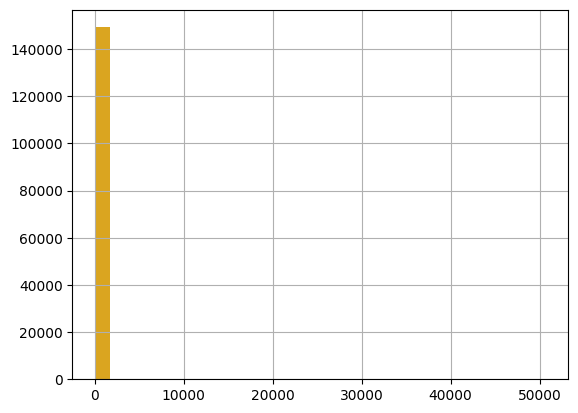

In [ ]:
# Распределение переменных с большим смещением
df.RevolvingUtilizationOfUnsecuredLines.hist(bins = 30, histtype='stepfilled', orientation='vertical', color='goldenrod')

<Axes: >

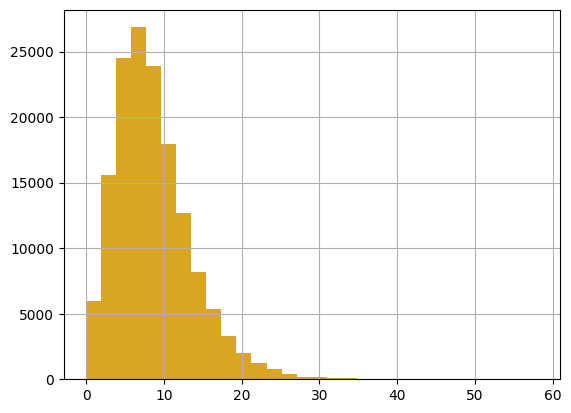

In [ ]:
# Распределение, у которого почти не должно быть смещения
df.NumberOfOpenCreditLinesAndLoans.hist(bins = 30, histtype='stepfilled', orientation='vertical', color='goldenrod')

<Axes: >

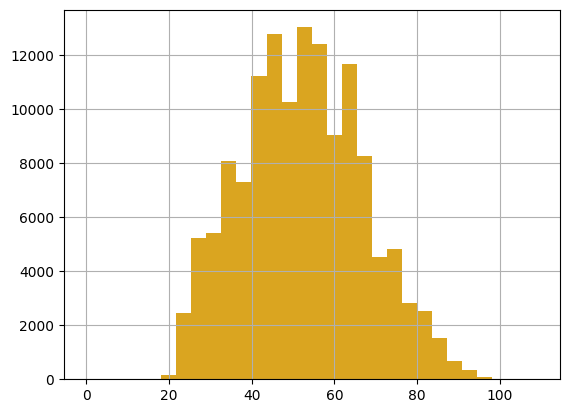

In [ ]:
df.age.hist(bins = 30, histtype='stepfilled', orientation='vertical', color='goldenrod')

<Axes: >

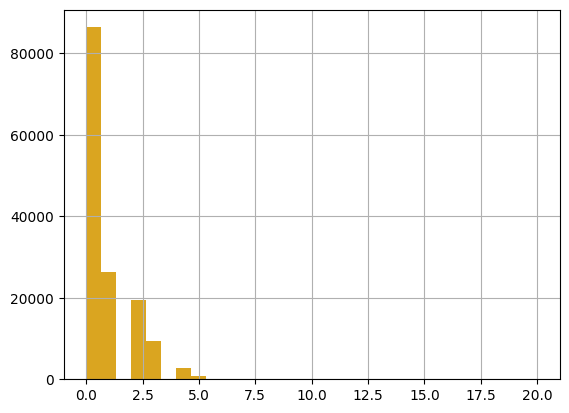

In [ ]:
df.NumberOfDependents.hist(bins = 30, histtype='stepfilled', orientation='vertical', color='goldenrod')

* Нормальное распределение имеет kurtosis около 0. Можем оценить количество выбросов по характеристикам z-распределения

* Значение больше 0 - распределение островершнинное (leptokurtic), значит в хвостах распределения много значений (= много выбросов)
* Значение меньше 0 - распределение с отрицательным эксцессом (platykurtic), в таком распределении мало или нет выбросов.

In [ ]:
numeric_features.kurtosis()

SeriousDlqin2yrs                           10.033103
RevolvingUtilizationOfUnsecuredLines    14544.713410
age                                        -0.494214
NumberOfTime30-59DaysPastDueNotWorse      522.376545
DebtRatio                               13734.288858
MonthlyIncome                           19504.705403
NumberOfOpenCreditLinesAndLoans             3.091067
NumberOfTimes90DaysLate                   537.738945
NumberOfTime60-89DaysPastDueNotWorse      545.682744
NumberOfDependents                          3.001657
dtype: float64

<Axes: >

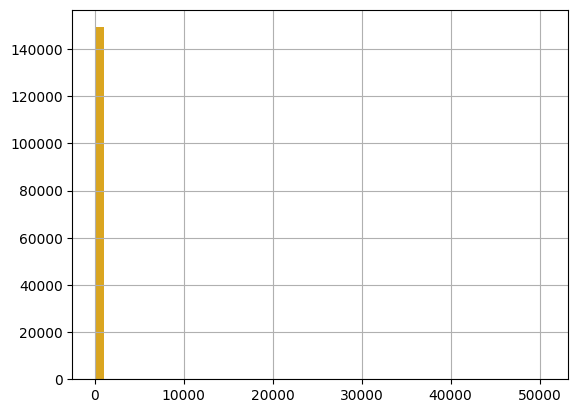

In [ ]:
# Распределение с kurtosis больше 5
df['RevolvingUtilizationOfUnsecuredLines'].hist(bins = 50, histtype='stepfilled', orientation='vertical', color='goldenrod')

Интересно посмотреть на целевую переменную

In [ ]:
# Для удобства выделю целевую переменную в вектор y
y = df['SeriousDlqin2yrs']

3.463413460570604
9.995366635922904


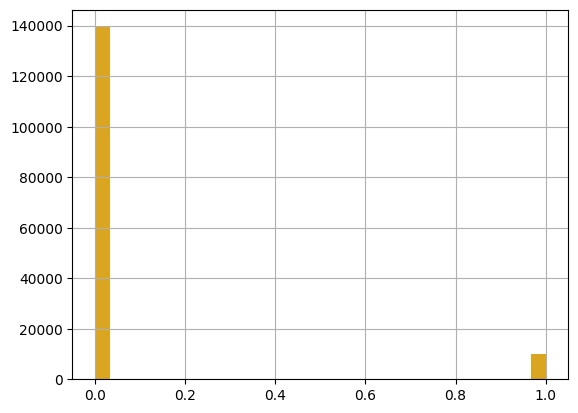

In [ ]:
y.hist(bins = 30, histtype='stepfilled', orientation='vertical', color='goldenrod') # строю распределение
print(y.skew())
print(y.kurtosis())

In [ ]:
# описательная статистика целевой переменной
y.describe()

count    149366.00000
mean          0.06701
std           0.25004
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: SeriousDlqin2yrs, dtype: float64

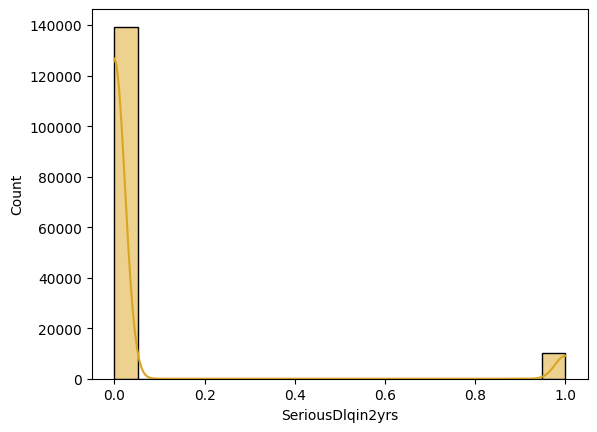

In [ ]:
sns.histplot(y, kde=True, color='goldenrod')
plt.show()

>**Промежуточный вывод:** целевая переменная - поле SeriousDlqin2yrs - имел ли клиент просрочку 90 или более дней. Представляет собой категориальный признак, принимающий значения 1 и 0.

>Наблюдается существенный дисбаланс в распределении целевых значений.



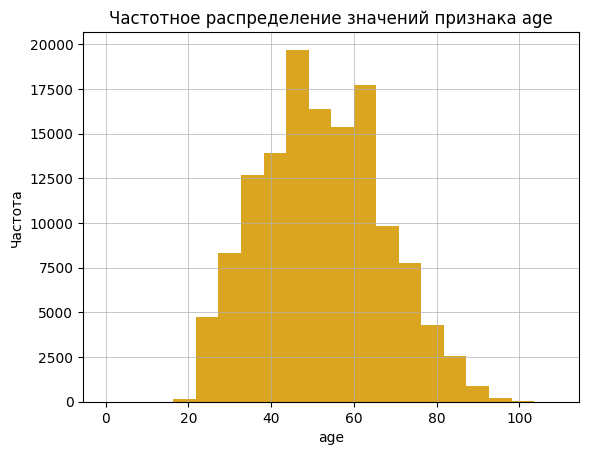

In [ ]:
# Изучим сбалансированность набора данных по признаку age
plt.hist(df['age'], bins=20, histtype='stepfilled', orientation='vertical', color='goldenrod')
plt.xlabel('age')
plt.ylabel('Частота')
plt.xticks(rotation='horizontal')
plt.title('Частотное распределение значений признака age')
plt.grid(linewidth=0.5)
plt.show()

Частотное распределение представляет собой колоколообразную кривую с пиком в центре диапазона значений, из чего можно сделать вывод, что набор данных достаточно хорошо сбалансирован по возрастному признаку.

**Пропуски.**






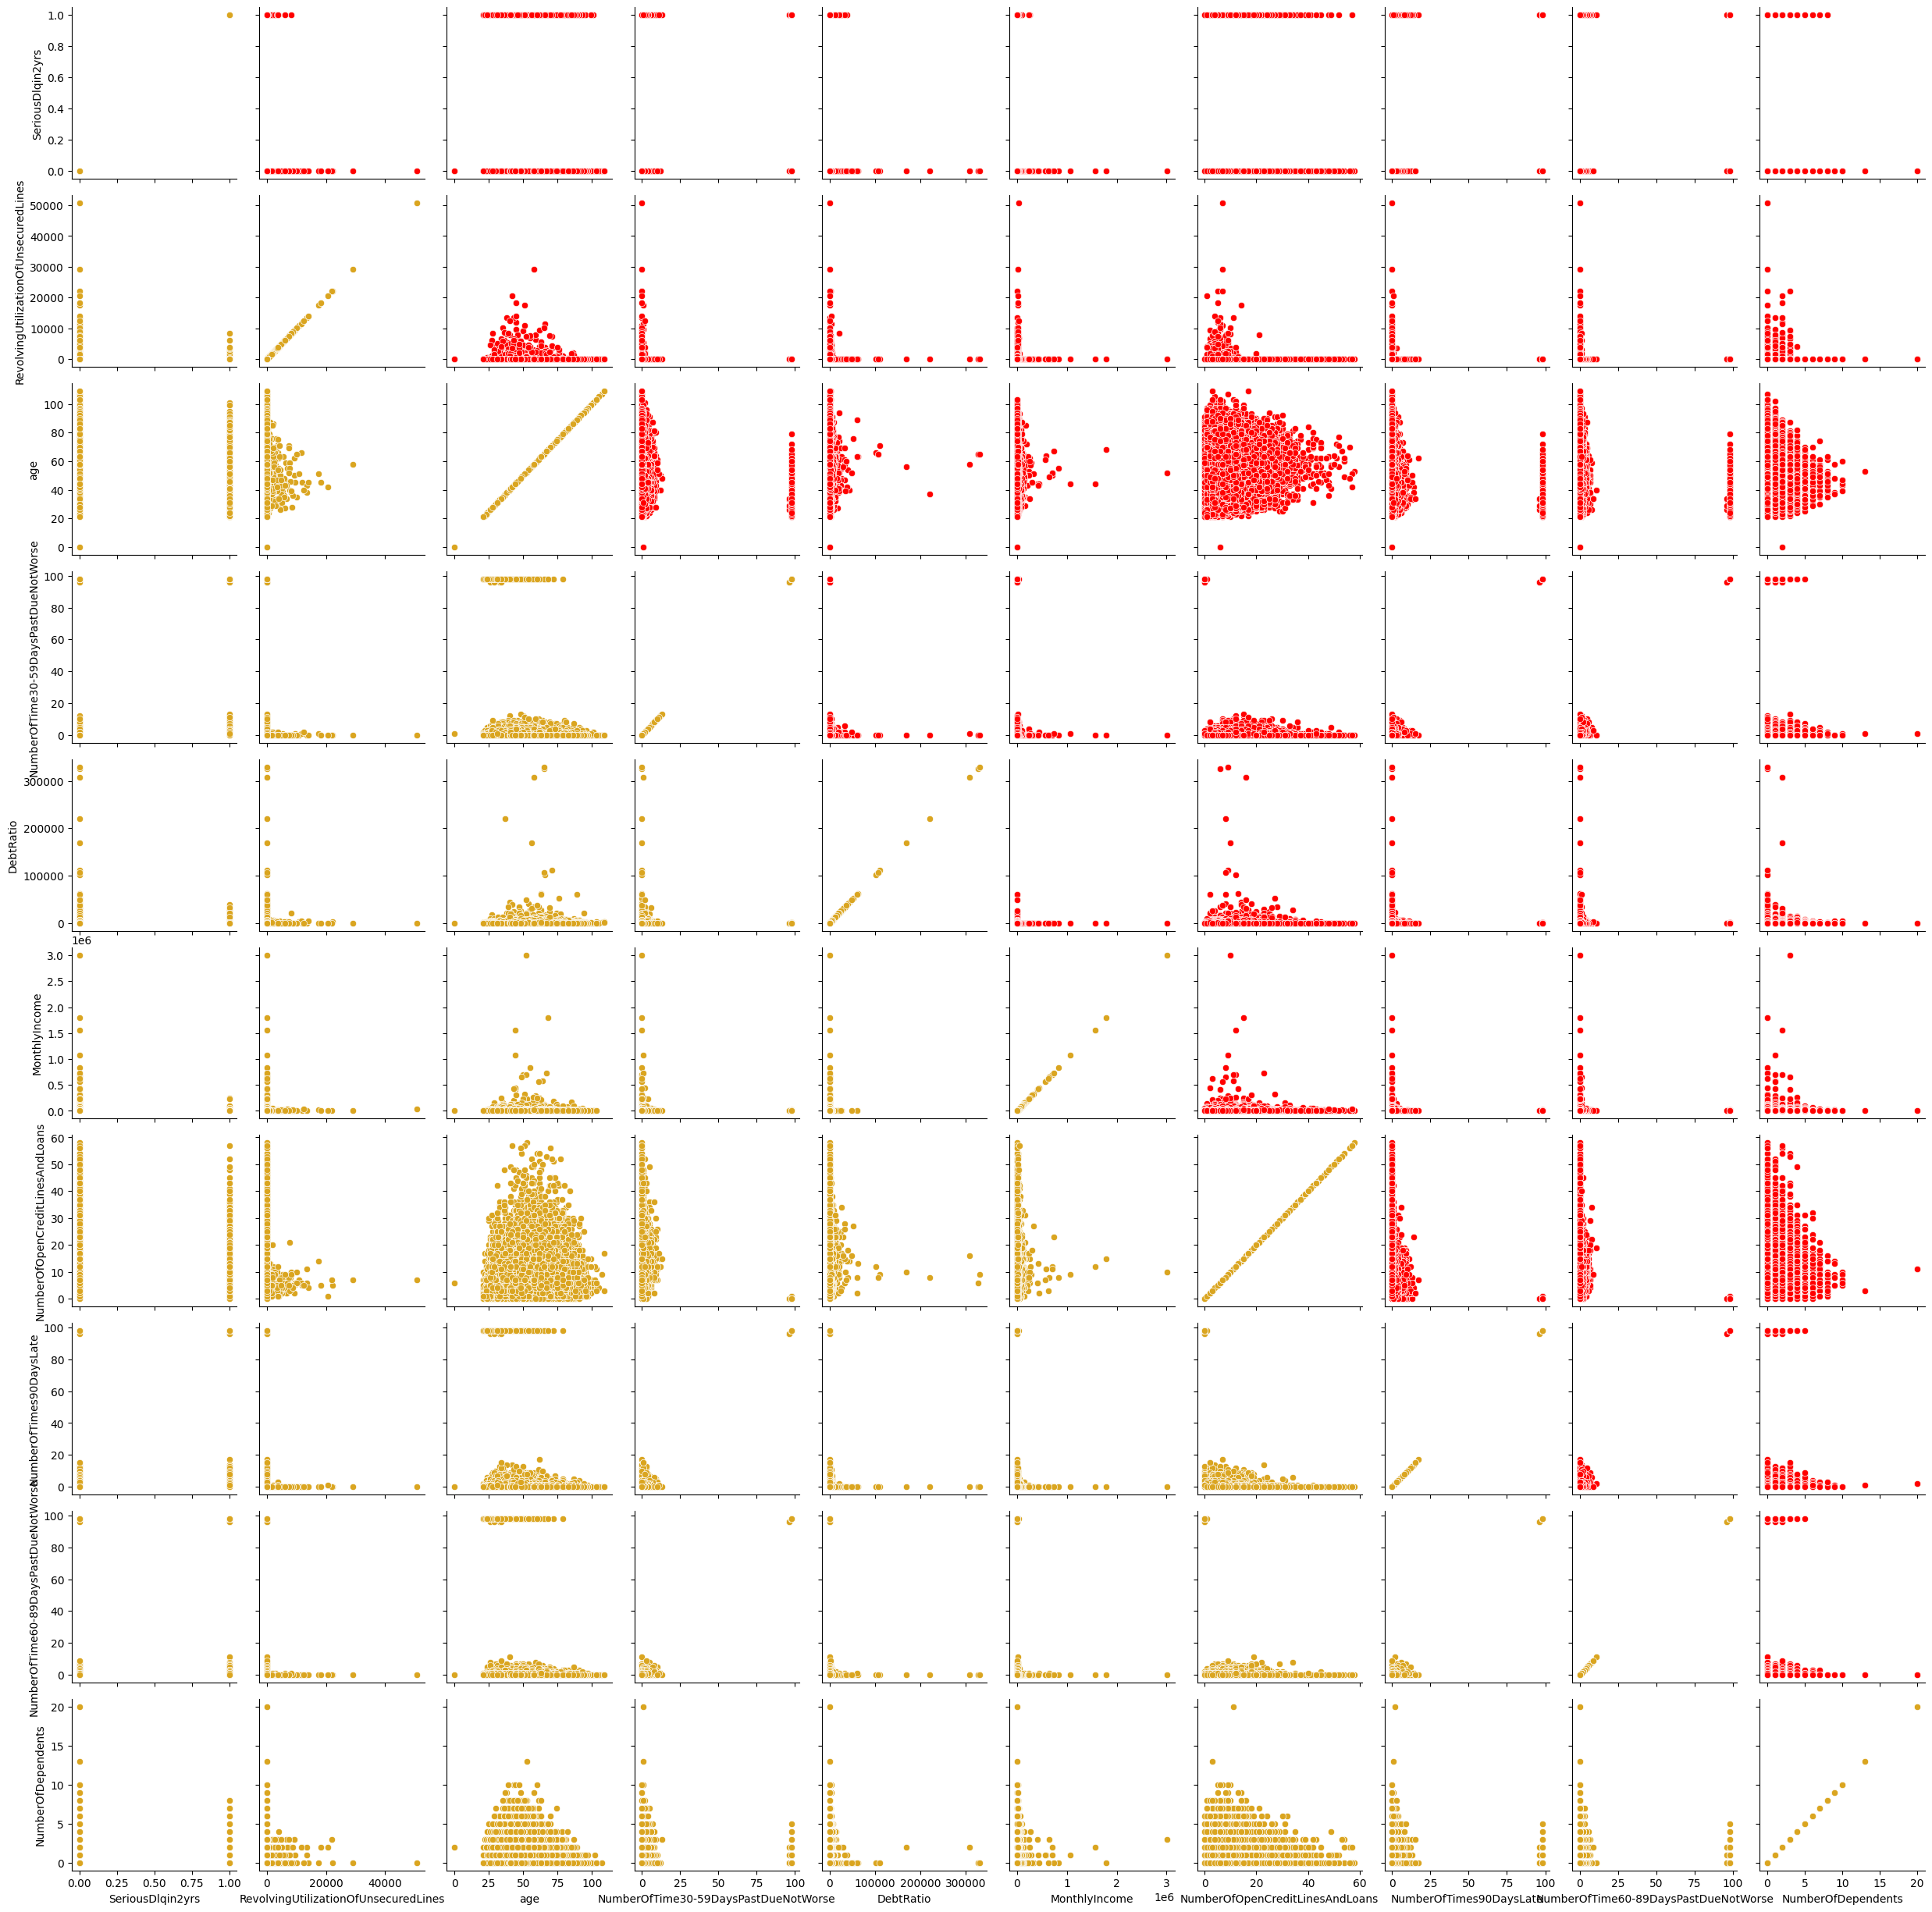

In [ ]:
# Попарные графики рассеяния
g = sns.PairGrid(df[df.columns])
g.map(sns.scatterplot, color = 'goldenrod')
g.map_upper(sns.scatterplot, color = 'r')

plt.show()

In [ ]:
df.describe(include='all')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
count,149366.00000,149366.000000,134633.000000,149366.000000,149366.000000,1.201710e+05,149366.000000,149366.000000,149366.000000,145542.000000,149366,149366
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,d
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139414,47168
mean,0.06701,6.072049,52.305000,0.395913,354.495057,6.674999e+03,8.481823,0.240075,0.214507,0.759987,NaN,NaN
std,0.25004,250.284604,14.727369,3.878021,2042.009339,1.438955e+04,5.136322,3.851472,3.835957,1.116188,NaN,NaN
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.00000,0.030149,41.000000,0.000000,0.177489,3.400000e+03,5.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.00000,0.154252,52.000000,0.000000,0.368275,5.400000e+03,8.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.00000,0.556480,63.000000,0.000000,0.875333,8.250000e+03,11.000000,0.000000,0.000000,1.000000,NaN,NaN


In [ ]:
# посмотрим в каких признаках есть пропуски
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                     14733
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29195
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3824
RealEstateLoansOrLines                      0
GroupAge                                    0
dtype: int64

In [ ]:
display('Доля пропущенных значений до обработки данных:')
display(pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient(cmap="YlOrRd"))

'Доля пропущенных значений до обработки данных:'

,0
SeriousDlqin2yrs,0.000000
RevolvingUtilizationOfUnsecuredLines,0.000000
age,10.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000000
DebtRatio,0.000000
MonthlyIncome,20.000000
NumberOfOpenCreditLinesAndLoans,0.000000
NumberOfTimes90DaysLate,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0.000000
NumberOfDependents,3.000000


>**Промежуточный вывод:**Наблюдается отсутствие большей доли данных (20%) по ежемесячному доходу (MonthlyIncome), а также данные по возрасту клиентов(age)(10%) по количеству иждивенцев на попечении (супруги, дети и др) (NumberOfDependents)(3%).

In [ ]:
# посчитаем среднеее значение age
age = df['age'].mean()


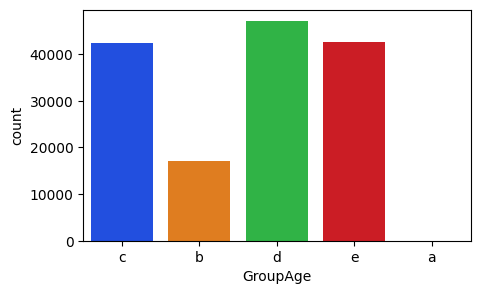

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='GroupAge', data = df, palette='bright')

plt.show()

In [ ]:
# заполним пропуски средним значением для age
df['age'].fillna(age, inplace=True)

In [ ]:
# посчитаем среднеее значение MonthlyIncome
MonthlyIncome = df['MonthlyIncome'].mean()

In [ ]:
# заполним пропуски средним значением для MonthlyIncome
df['MonthlyIncome'].fillna(MonthlyIncome, inplace=True)

In [ ]:
# Описательная статистика NumberOfDependents
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    149366.000000
mean          8.481823
std           5.136322
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [ ]:
# посчитаем среднеее значение NumberOfDependents
NumberOfDependents = df['NumberOfDependents'].mean()

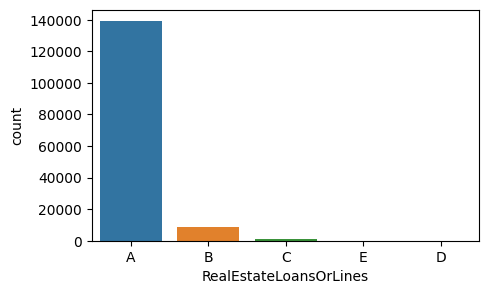

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='RealEstateLoansOrLines', data = df)
sns.set_palette('viridis')
sns.set_style({
    'axes.facecolor': '.95',
    'axes.edgecolor':'.9'
})

plt.show()

>**Промежуточный вывод:** пропуски заменены средними значениями.





**Поработаем с категориальными признаками.**

In [ ]:
categorical_features.head()

,RealEstateLoansOrLines,GroupAge
0,A,c
1,A,b
2,A,c
3,A,b
4,A,d


import numpy as np
from google.colab import autoviz
df_2145270013216818290 = autoviz.get_registered_df('df_2145270013216818290')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2145270013216818290, *['GroupAge'], **{})
chart

In [ ]:
categorical_features.tail(15)

,RealEstateLoansOrLines,GroupAge
149985,A,b
149986,A,b
149987,A,d
149988,A,e
149989,A,c
149990,A,b
149991,A,c
149992,A,d
149993,A,d
149994,A,d


import numpy as np
from google.colab import autoviz
df_4004157116983114041 = autoviz.get_registered_df('df_4004157116983114041')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4004157116983114041, *['GroupAge'], **{})
chart

In [ ]:
# Cгруппируюем объекты таблицы по значениям колонки:
df["RealEstateLoansOrLines"].value_counts()

A    139414
B      8470
C      1388
D        84
E        10
Name: RealEstateLoansOrLines, dtype: int64

In [ ]:
df["GroupAge"].value_counts()

d    47168
e    42652
c    42404
b    17141
a        1
Name: GroupAge, dtype: int64

>**Промежуточный вывод:**По подсчёту значений категориальных признаков можно наблюдать, что в признаке "GroupAge" есть только одно значение а.  Возможно, что это ошибка в данных.  Попробуем это значение удалить.

In [ ]:
df = df[df['GroupAge'] != 'a']


In [ ]:
df["GroupAge"].value_counts()

d    47168
e    42652
c    42404
b    17141
Name: GroupAge, dtype: int64

In [ ]:
df['GroupAge'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         c
1         b
2         c
3         b
4         d
         ..
149995    d
149996    d
149997    e
149998    c
149999    c
Name: GroupAge, Length: 149365, dtype: object>

### Кодирование категориальных признаков

>🎓Если категориальный признак имеет больше двух категорий, то в общем случае его нельзя закодировать подряд идущими числами - так как при такой кодировке числа нельзя сравнивать между собой.

При помощи  One Hot Encodin в GroupAge закодируем категориальные признаки

In [ ]:
OHE = OneHotEncoder(handle_unknown='ignore')
from pandas.core.reshape.concat import concat

In [ ]:
df = pd.get_dummies(df, columns=['GroupAge'], drop_first=True)

In [ ]:
df = pd.get_dummies(df, columns=['RealEstateLoansOrLines'], drop_first=True)

In [ ]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,GroupAge_c,GroupAge_d,GroupAge_e,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,1,0,0,0,0,0,0
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,0,0,0,0,0,0,0
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,1,0,0,0,0,0,0
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,0,0,0,0,0,0,0
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,0,1,0,0,0,0,0


import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_903036516118948540, *['SeriousDlqin2yrs'], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_903036516118948540, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_903036516118948540, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_903036516118948540, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_903036516118948540, *['SeriousDlqin2yrs'], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_903036516118948540, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_903036516118948540, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_903036516118948540, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_903036516118948540, *[[['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines'], ['RevolvingUtilizationOfUnsecuredLines', 'age'], ['age', 'DebtRatio'], ['DebtRatio', 'MonthlyIncome']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_903036516118948540, *['GroupAge_d', 'SeriousDlqin2yrs', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_903036516118948540, *['GroupAge_d', 'RevolvingUtilizationOfUnsecuredLines', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_903036516118948540, *['GroupAge_d', 'age', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_903036516118948540 = autoviz.get_registered_df('df_903036516118948540')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_903036516118948540, *['GroupAge_d', 'DebtRatio', None], **{})
chart

##Взаимосвязь признаков

>🎓Коэффициент корреляции $\rho$ - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

>$-1 \leq \rho \leq 1$

>Чем больше **по модулю** коэффициент корреляции $\rho$ - тем больше взаимосвязь между величинами.

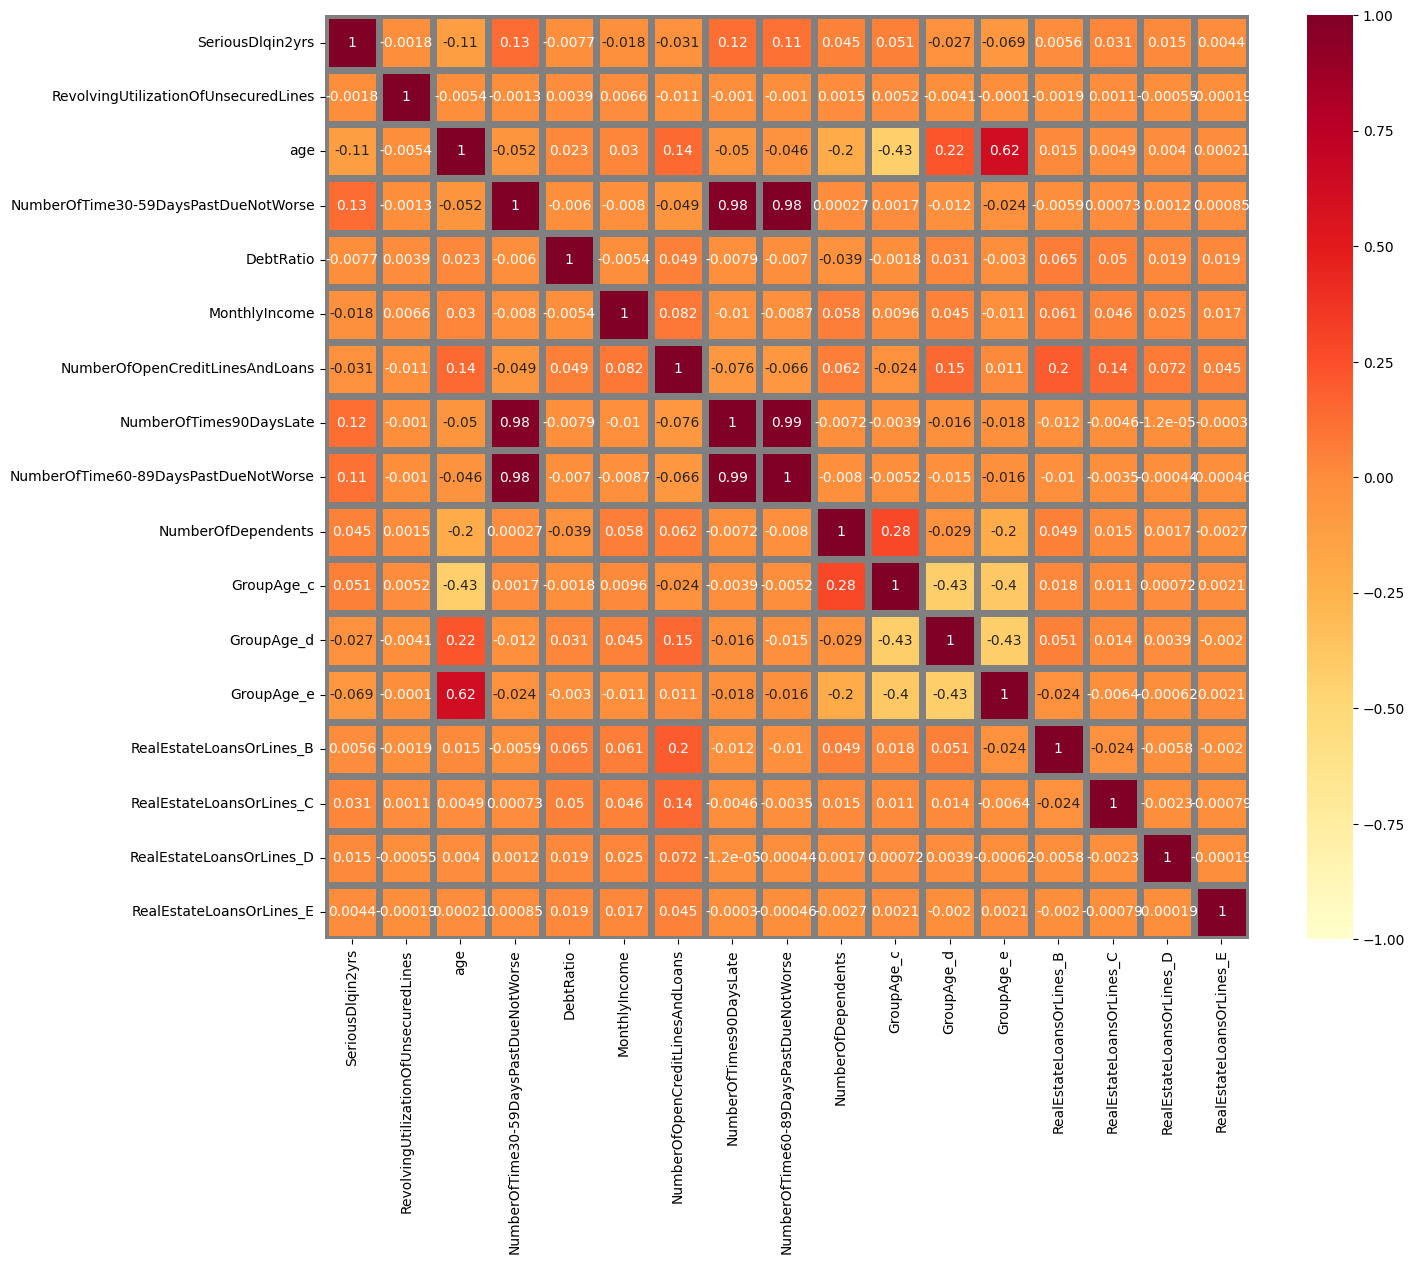

In [ ]:
# Матрица корреляции
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmin=-1, vmax=1, center= 0, annot=True, fmt='.2g', cmap='YlOrRd', linewidths=5, linecolor='grey', square=True, ax=ax)
plt.show()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap="YlOrRd")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,GroupAge_c,GroupAge_d,GroupAge_e,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E
SeriousDlqin2yrs,1.000000,-0.001819,-0.110373,0.131215,-0.007727,-0.018077,-0.030589,0.122239,0.106106,0.045339,0.050863,-0.027059,-0.068951,0.005606,0.030973,0.015101,0.004352
RevolvingUtilizationOfUnsecuredLines,-0.001819,1.000000,-0.005430,-0.001293,0.003945,0.006559,-0.011450,-0.001016,-0.001001,0.001487,0.005162,-0.004111,-0.000103,-0.001918,0.001110,-0.000549,-0.000190
age,-0.110373,-0.005430,1.000000,-0.052127,0.022778,0.030002,0.140071,-0.049941,-0.045990,-0.198900,-0.433053,0.222257,0.618850,0.015193,0.004897,0.003962,0.000208
NumberOfTime30-59DaysPastDueNotWorse,0.131215,-0.001293,-0.052127,1.000000,-0.005965,-0.008039,-0.049328,0.980744,0.984734,0.000271,0.001738,-0.011637,-0.024219,-0.005900,0.000728,0.001219,0.000853
DebtRatio,-0.007727,0.003945,0.022778,-0.005965,1.000000,-0.005360,0.048789,-0.007860,-0.007008,-0.038721,-0.001847,0.030974,-0.002953,0.064812,0.049583,0.018661,0.019467
MonthlyIncome,-0.018077,0.006559,0.030002,-0.008039,-0.005360,1.000000,0.082223,-0.010040,-0.008715,0.058366,0.009606,0.044522,-0.011099,0.061327,0.046373,0.024674,0.017442
NumberOfOpenCreditLinesAndLoans,-0.030589,-0.011450,0.140071,-0.049328,0.048789,0.082223,1.000000,-0.075921,-0.066239,0.061529,-0.024142,0.145409,0.010754,0.199987,0.144247,0.072053,0.045272
NumberOfTimes90DaysLate,0.122239,-0.001016,-0.049941,0.980744,-0.007860,-0.010040,-0.075921,1.000000,0.991525,-0.007247,-0.003868,-0.015934,-0.018260,-0.012457,-0.004642,-0.000012,-0.000298
NumberOfTime60-89DaysPastDueNotWorse,0.106106,-0.001001,-0.045990,0.984734,-0.007008,-0.008715,-0.066239,0.991525,1.000000,-0.008006,-0.005218,-0.014703,-0.015967,-0.010466,-0.003488,-0.000443,-0.000458
NumberOfDependents,0.045339,0.001487,-0.198900,0.000271,-0.038721,0.058366,0.061529,-0.007247,-0.008006,1.000000,0.279623,-0.029275,-0.196091,0.049189,0.015487,0.001713,-0.002673


In [ ]:
correlation = numeric_features.corr()
correlation.head()
corr.style.background_gradient(cmap="YlOrRd")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,GroupAge_c,GroupAge_d,GroupAge_e,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E
SeriousDlqin2yrs,1.000000,-0.001819,-0.110373,0.131215,-0.007727,-0.018077,-0.030589,0.122239,0.106106,0.045339,0.050863,-0.027059,-0.068951,0.005606,0.030973,0.015101,0.004352
RevolvingUtilizationOfUnsecuredLines,-0.001819,1.000000,-0.005430,-0.001293,0.003945,0.006559,-0.011450,-0.001016,-0.001001,0.001487,0.005162,-0.004111,-0.000103,-0.001918,0.001110,-0.000549,-0.000190
age,-0.110373,-0.005430,1.000000,-0.052127,0.022778,0.030002,0.140071,-0.049941,-0.045990,-0.198900,-0.433053,0.222257,0.618850,0.015193,0.004897,0.003962,0.000208
NumberOfTime30-59DaysPastDueNotWorse,0.131215,-0.001293,-0.052127,1.000000,-0.005965,-0.008039,-0.049328,0.980744,0.984734,0.000271,0.001738,-0.011637,-0.024219,-0.005900,0.000728,0.001219,0.000853
DebtRatio,-0.007727,0.003945,0.022778,-0.005965,1.000000,-0.005360,0.048789,-0.007860,-0.007008,-0.038721,-0.001847,0.030974,-0.002953,0.064812,0.049583,0.018661,0.019467
MonthlyIncome,-0.018077,0.006559,0.030002,-0.008039,-0.005360,1.000000,0.082223,-0.010040,-0.008715,0.058366,0.009606,0.044522,-0.011099,0.061327,0.046373,0.024674,0.017442
NumberOfOpenCreditLinesAndLoans,-0.030589,-0.011450,0.140071,-0.049328,0.048789,0.082223,1.000000,-0.075921,-0.066239,0.061529,-0.024142,0.145409,0.010754,0.199987,0.144247,0.072053,0.045272
NumberOfTimes90DaysLate,0.122239,-0.001016,-0.049941,0.980744,-0.007860,-0.010040,-0.075921,1.000000,0.991525,-0.007247,-0.003868,-0.015934,-0.018260,-0.012457,-0.004642,-0.000012,-0.000298
NumberOfTime60-89DaysPastDueNotWorse,0.106106,-0.001001,-0.045990,0.984734,-0.007008,-0.008715,-0.066239,0.991525,1.000000,-0.008006,-0.005218,-0.014703,-0.015967,-0.010466,-0.003488,-0.000443,-0.000458
NumberOfDependents,0.045339,0.001487,-0.198900,0.000271,-0.038721,0.058366,0.061529,-0.007247,-0.008006,1.000000,0.279623,-0.029275,-0.196091,0.049189,0.015487,0.001713,-0.002673


In [ ]:
# выводим коэффиценты попарной корреляции с целевой переменной (SeriousDlqin2yrs)
print(correlation['SeriousDlqin2yrs'].sort_values(ascending = False),'\n')

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046048
RevolvingUtilizationOfUnsecuredLines   -0.001802
DebtRatio                              -0.007602
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.116049
Name: SeriousDlqin2yrs, dtype: float64 



In [ ]:
corr['SeriousDlqin2yrs'].sort_values(ascending = False).head(11).index

Index(['SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse',
       'GroupAge_c', 'NumberOfDependents', 'RealEstateLoansOrLines_C',
       'RealEstateLoansOrLines_D', 'RealEstateLoansOrLines_B',
       'RealEstateLoansOrLines_E', 'RevolvingUtilizationOfUnsecuredLines'],
      dtype='object')

In [ ]:
# сохраняем интересующие нас колонки для фильтрации
cols = corr.nlargest(11,'SeriousDlqin2yrs')['SeriousDlqin2yrs'].index
corr.style.background_gradient(cmap="YlOrRd")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,GroupAge_c,GroupAge_d,GroupAge_e,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E
SeriousDlqin2yrs,1.000000,-0.001819,-0.110373,0.131215,-0.007727,-0.018077,-0.030589,0.122239,0.106106,0.045339,0.050863,-0.027059,-0.068951,0.005606,0.030973,0.015101,0.004352
RevolvingUtilizationOfUnsecuredLines,-0.001819,1.000000,-0.005430,-0.001293,0.003945,0.006559,-0.011450,-0.001016,-0.001001,0.001487,0.005162,-0.004111,-0.000103,-0.001918,0.001110,-0.000549,-0.000190
age,-0.110373,-0.005430,1.000000,-0.052127,0.022778,0.030002,0.140071,-0.049941,-0.045990,-0.198900,-0.433053,0.222257,0.618850,0.015193,0.004897,0.003962,0.000208
NumberOfTime30-59DaysPastDueNotWorse,0.131215,-0.001293,-0.052127,1.000000,-0.005965,-0.008039,-0.049328,0.980744,0.984734,0.000271,0.001738,-0.011637,-0.024219,-0.005900,0.000728,0.001219,0.000853
DebtRatio,-0.007727,0.003945,0.022778,-0.005965,1.000000,-0.005360,0.048789,-0.007860,-0.007008,-0.038721,-0.001847,0.030974,-0.002953,0.064812,0.049583,0.018661,0.019467
MonthlyIncome,-0.018077,0.006559,0.030002,-0.008039,-0.005360,1.000000,0.082223,-0.010040,-0.008715,0.058366,0.009606,0.044522,-0.011099,0.061327,0.046373,0.024674,0.017442
NumberOfOpenCreditLinesAndLoans,-0.030589,-0.011450,0.140071,-0.049328,0.048789,0.082223,1.000000,-0.075921,-0.066239,0.061529,-0.024142,0.145409,0.010754,0.199987,0.144247,0.072053,0.045272
NumberOfTimes90DaysLate,0.122239,-0.001016,-0.049941,0.980744,-0.007860,-0.010040,-0.075921,1.000000,0.991525,-0.007247,-0.003868,-0.015934,-0.018260,-0.012457,-0.004642,-0.000012,-0.000298
NumberOfTime60-89DaysPastDueNotWorse,0.106106,-0.001001,-0.045990,0.984734,-0.007008,-0.008715,-0.066239,0.991525,1.000000,-0.008006,-0.005218,-0.014703,-0.015967,-0.010466,-0.003488,-0.000443,-0.000458
NumberOfDependents,0.045339,0.001487,-0.198900,0.000271,-0.038721,0.058366,0.061529,-0.007247,-0.008006,1.000000,0.279623,-0.029275,-0.196091,0.049189,0.015487,0.001713,-0.002673


In [ ]:
corr.loc[cols, cols]
corr.style.background_gradient(cmap="YlOrRd")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,GroupAge_c,GroupAge_d,GroupAge_e,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E
SeriousDlqin2yrs,1.000000,-0.001819,-0.110373,0.131215,-0.007727,-0.018077,-0.030589,0.122239,0.106106,0.045339,0.050863,-0.027059,-0.068951,0.005606,0.030973,0.015101,0.004352
RevolvingUtilizationOfUnsecuredLines,-0.001819,1.000000,-0.005430,-0.001293,0.003945,0.006559,-0.011450,-0.001016,-0.001001,0.001487,0.005162,-0.004111,-0.000103,-0.001918,0.001110,-0.000549,-0.000190
age,-0.110373,-0.005430,1.000000,-0.052127,0.022778,0.030002,0.140071,-0.049941,-0.045990,-0.198900,-0.433053,0.222257,0.618850,0.015193,0.004897,0.003962,0.000208
NumberOfTime30-59DaysPastDueNotWorse,0.131215,-0.001293,-0.052127,1.000000,-0.005965,-0.008039,-0.049328,0.980744,0.984734,0.000271,0.001738,-0.011637,-0.024219,-0.005900,0.000728,0.001219,0.000853
DebtRatio,-0.007727,0.003945,0.022778,-0.005965,1.000000,-0.005360,0.048789,-0.007860,-0.007008,-0.038721,-0.001847,0.030974,-0.002953,0.064812,0.049583,0.018661,0.019467
MonthlyIncome,-0.018077,0.006559,0.030002,-0.008039,-0.005360,1.000000,0.082223,-0.010040,-0.008715,0.058366,0.009606,0.044522,-0.011099,0.061327,0.046373,0.024674,0.017442
NumberOfOpenCreditLinesAndLoans,-0.030589,-0.011450,0.140071,-0.049328,0.048789,0.082223,1.000000,-0.075921,-0.066239,0.061529,-0.024142,0.145409,0.010754,0.199987,0.144247,0.072053,0.045272
NumberOfTimes90DaysLate,0.122239,-0.001016,-0.049941,0.980744,-0.007860,-0.010040,-0.075921,1.000000,0.991525,-0.007247,-0.003868,-0.015934,-0.018260,-0.012457,-0.004642,-0.000012,-0.000298
NumberOfTime60-89DaysPastDueNotWorse,0.106106,-0.001001,-0.045990,0.984734,-0.007008,-0.008715,-0.066239,0.991525,1.000000,-0.008006,-0.005218,-0.014703,-0.015967,-0.010466,-0.003488,-0.000443,-0.000458
NumberOfDependents,0.045339,0.001487,-0.198900,0.000271,-0.038721,0.058366,0.061529,-0.007247,-0.008006,1.000000,0.279623,-0.029275,-0.196091,0.049189,0.015487,0.001713,-0.002673


Вывод: зависимость есть.



Наблюдается сильная взаимная корреляция между признаками NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse и NumberOfTime30-59DaysPastDueNotWorse. Лишние признаки необходимо удалить. Решение о том, какие признаки удалить, можно принимать на основании коэффициента корреляции каждого признака и целевой переменной.

**Посмотрим на попарные зависимости некоторых признаков.**

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap="YlOrRd")

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,GroupAge_c,GroupAge_d,GroupAge_e,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E
SeriousDlqin2yrs,1.000000,-0.001819,-0.110373,0.131215,-0.007727,-0.018077,-0.030589,0.122239,0.106106,0.045339,0.050863,-0.027059,-0.068951,0.005606,0.030973,0.015101,0.004352
RevolvingUtilizationOfUnsecuredLines,-0.001819,1.000000,-0.005430,-0.001293,0.003945,0.006559,-0.011450,-0.001016,-0.001001,0.001487,0.005162,-0.004111,-0.000103,-0.001918,0.001110,-0.000549,-0.000190
age,-0.110373,-0.005430,1.000000,-0.052127,0.022778,0.030002,0.140071,-0.049941,-0.045990,-0.198900,-0.433053,0.222257,0.618850,0.015193,0.004897,0.003962,0.000208
NumberOfTime30-59DaysPastDueNotWorse,0.131215,-0.001293,-0.052127,1.000000,-0.005965,-0.008039,-0.049328,0.980744,0.984734,0.000271,0.001738,-0.011637,-0.024219,-0.005900,0.000728,0.001219,0.000853
DebtRatio,-0.007727,0.003945,0.022778,-0.005965,1.000000,-0.005360,0.048789,-0.007860,-0.007008,-0.038721,-0.001847,0.030974,-0.002953,0.064812,0.049583,0.018661,0.019467
MonthlyIncome,-0.018077,0.006559,0.030002,-0.008039,-0.005360,1.000000,0.082223,-0.010040,-0.008715,0.058366,0.009606,0.044522,-0.011099,0.061327,0.046373,0.024674,0.017442
NumberOfOpenCreditLinesAndLoans,-0.030589,-0.011450,0.140071,-0.049328,0.048789,0.082223,1.000000,-0.075921,-0.066239,0.061529,-0.024142,0.145409,0.010754,0.199987,0.144247,0.072053,0.045272
NumberOfTimes90DaysLate,0.122239,-0.001016,-0.049941,0.980744,-0.007860,-0.010040,-0.075921,1.000000,0.991525,-0.007247,-0.003868,-0.015934,-0.018260,-0.012457,-0.004642,-0.000012,-0.000298
NumberOfTime60-89DaysPastDueNotWorse,0.106106,-0.001001,-0.045990,0.984734,-0.007008,-0.008715,-0.066239,0.991525,1.000000,-0.008006,-0.005218,-0.014703,-0.015967,-0.010466,-0.003488,-0.000443,-0.000458
NumberOfDependents,0.045339,0.001487,-0.198900,0.000271,-0.038721,0.058366,0.061529,-0.007247,-0.008006,1.000000,0.279623,-0.029275,-0.196091,0.049189,0.015487,0.001713,-0.002673


**Вывод:** классы сильно несбалансированны. Наблюдается, что количество просрочек намного меньше.

Обращу внимание на следующее:

Поскольку классы сильно несбалансированны, то метрика качества accuracy нам не подойдёт. Потому что метрика качества accuracy при сильно несбалансированной выборке не отражает качество работы алгоритма, а только показывает завышенное качество, не отражая реального качества модели.

Буду смотреть на другие метрики и на confusion matrix.

Для подбора наилучшей метрики следует узнать больше о политике банка.


Рассмотрю несколько вариантов выбора метрики.

Хорошим способом измерить качество бинарной классификации является матрица ошибок.

Существует две удобные метрики, с помощью которых можно измерить качество модели, используя матрицу ошибок:



*   Precision (a, X) =
$$
\begin{split}\frac{TP}{TP + FP}\end{split}
$$




*   Recall (a, X) =
$$
\begin{split}\frac{TP}{TF + FN}\end{split}
$$



I вариант:

Банк планирует выдавать меньше кредитов тем людям, которые в положенный срок не смогут погасить кредит.  Тогда будем придерживаться стратегии стремления к наивысшему значению метрики recall, потому что будет меньше False Negative ответов.

II вариант:

Банк заинтересован, чтобы как можно больше людей брали кредиты, а также выдавать кредиты тем людям, которые за него не смогут расплатиться в положенный срок. Тогда будем придерживаться стратегии, чтобы максимизировать метрику precision, но в этом случае будет больше False Positive ответов.

III вариант:

Максимизация метрики f1, как среднегармонического от precision и recall.

F1 score - хорошая метрика, позволяющая по одному значению оценить качество модели бинарной классификации и не волноваться о влиянии дисбаланса классов.


В нашем случае стоит условие: если у клиента банка были просрочки, то банк не выдает кредит, а если не было -  выдает.


Для оценки качества модели буду использовать метрку recall и буду её максимизировать.

##**Подготовка данных к обучению**

**Цель:** попробуем по характеристикам  предсказать, спрогнозировать целевую переменную - имел клиент просрочку  или нет (и если имел, то банк не будет выдавать кредит этому клиенту, а иначе будет).

In [ ]:
X = df.drop(['SeriousDlqin2yrs'], axis=1)

y = df['SeriousDlqin2yrs'] # целевая переменная (target), представляет собой категориальный признак, принимающий значения 1 и 0.

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,GroupAge_c,GroupAge_d,GroupAge_e,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E
0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,1,0,0,0,0,0,0
1,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,0,0,0,0,0,0,0
2,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,1,0,0,0,0,0,0
3,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,0,0,0,0,0,0,0
4,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,0,1,0,0,0,0,0


import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_627097174773052885, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_627097174773052885, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_627097174773052885, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_627097174773052885, *['MonthlyIncome'], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_627097174773052885, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_627097174773052885, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_627097174773052885, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_627097174773052885, *['MonthlyIncome'], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_627097174773052885, *[[['RevolvingUtilizationOfUnsecuredLines', 'age'], ['age', 'DebtRatio'], ['DebtRatio', 'MonthlyIncome'], ['MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_627097174773052885, *['GroupAge_d', 'RevolvingUtilizationOfUnsecuredLines', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_627097174773052885, *['GroupAge_d', 'age', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_627097174773052885, *['GroupAge_d', 'DebtRatio', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_627097174773052885 = autoviz.get_registered_df('df_627097174773052885')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_627097174773052885, *['GroupAge_d', 'MonthlyIncome', None], **{})
chart

In [ ]:
pd.Series(y).value_counts(True)

0    0.93299
1    0.06701
Name: SeriousDlqin2yrs, dtype: float64

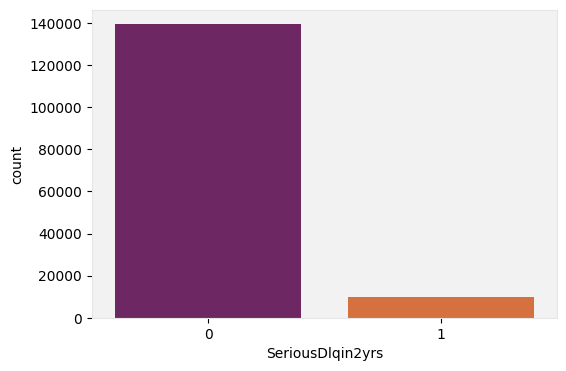

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, data = X, palette='inferno')
plt.show()

Промежуточный вывод: в целевой переменной наблюдается дисбаланс классов

**Разобъем данные на тренировочную и тестовую части**

Для обучения модели необходимо разделить набор данных на две части: для обучения и для тестирования. Разобъем набор данных при помощи функции train_test_split, входящей в библиотеку sklearn. Набор данных для обучения будет составлять 70% от всех данных, для тестирования - 30%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((104555, 16), (44810, 16))

**Масштабирование признаков**

>🎓Для обучения и более простой интерпретации многих моделей машинного обучения (для линейных моделей - обязательно) необходимо масштабировать признаки.

>🎓Масштабировать признаки означает привести их значения к одинаковым диапазонам.

In [ ]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,GroupAge_c,GroupAge_d,GroupAge_e,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E
9127,0.482890,56.0,0,0.399975,8127.0,22,0,0,0.0,0,1,0,0,0,0,0
15942,0.020000,57.0,0,0.361526,14128.0,12,0,0,1.0,0,1,0,0,0,0,0
75781,0.113057,51.0,0,0.180344,14000.0,12,0,0,3.0,0,1,0,0,0,0,0
86272,0.463920,29.0,0,147.000000,1.0,8,0,0,0.0,0,0,0,0,0,0,0
88409,0.344927,46.0,0,0.235294,6000.0,12,0,0,0.0,1,0,0,0,0,0,0


In [ ]:
ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,GroupAge_c,GroupAge_d,GroupAge_e,RealEstateLoansOrLines_B,RealEstateLoansOrLines_C,RealEstateLoansOrLines_D,RealEstateLoansOrLines_E
0,9.522947e-06,0.397727,0.0,1.213282e-06,2.701122e-03,0.379310,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3.944080e-07,0.409091,0.0,1.096650e-06,4.695638e-03,0.206897,0.0,0.0,0.05,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.229570e-06,0.340909,0.0,5.470548e-07,4.653095e-03,0.206897,0.0,0.0,0.15,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,9.148852e-06,0.090909,0.0,4.459086e-04,3.323639e-07,0.137931,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.802214e-06,0.284091,0.0,7.137392e-07,1.994184e-03,0.206897,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0


import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7613780792399534696, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7613780792399534696, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7613780792399534696, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7613780792399534696, *['MonthlyIncome'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7613780792399534696, *['RevolvingUtilizationOfUnsecuredLines'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7613780792399534696, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7613780792399534696, *['DebtRatio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7613780792399534696, *['MonthlyIncome'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7613780792399534696, *[[['RevolvingUtilizationOfUnsecuredLines', 'age'], ['age', 'DebtRatio'], ['DebtRatio', 'MonthlyIncome'], ['MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7613780792399534696, *['GroupAge_c', 'RevolvingUtilizationOfUnsecuredLines', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7613780792399534696, *['GroupAge_c', 'age', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7613780792399534696, *['GroupAge_c', 'DebtRatio', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7613780792399534696 = autoviz.get_registered_df('df_7613780792399534696')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7613780792399534696, *['GroupAge_c', 'MonthlyIncome', None], **{})
chart

# 🎓 Библиографический список



https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html

https://scikit-learn.org/stable/user_guide.html

Андреас Мюллер, Сара Гвидо "Введение в машинное обучение с помощью Python"
